## Pandas의 시각화 기능

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- Line graph

In [5]:
np.random.seed(0)
df = pd.DataFrame(np.random.randn(100,3), columns=list('ABC'),
                index=pd.date_range('2023-09-01', periods=100))
df.tail()

,A,B,C
2023-12-05,0.608844,-1.045253,1.211145
2023-12-06,0.689818,1.301846,-0.628088
2023-12-07,-0.481027,2.303917,-1.060016
2023-12-08,-0.135950,1.136891,0.097725
2023-12-09,0.582954,-0.399449,0.370056


In [6]:
df = df.cumsum()             #cumsum 누적해서 더함
df.tail()

,A,B,C
2023-12-05,9.396256,6.282026,-11.198087
2023-12-06,10.086074,7.583872,-11.826175
2023-12-07,9.605047,9.887789,-12.886190
2023-12-08,9.469097,11.024680,-12.788465
2023-12-09,10.052051,10.625231,-12.418409


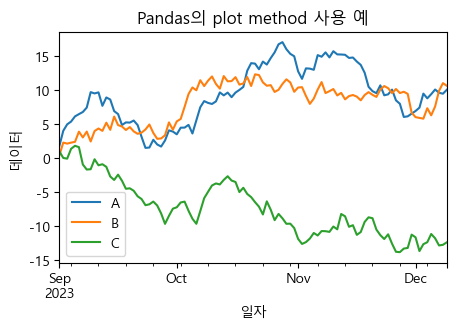

In [9]:
df.plot(figsize=(5,3))               # default가 line graph
plt.title('Pandas의 plot method 사용 예')
plt.xlabel('일자'), plt.ylabel('데이터')
plt.show()

- Bar chart

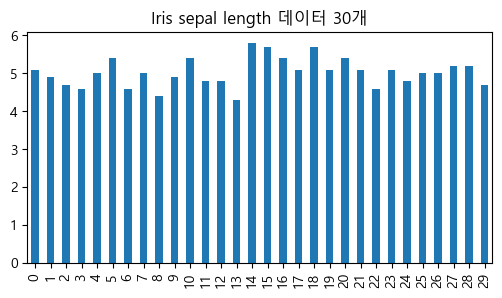

In [11]:
iris = sns.load_dataset('iris')

iris.sepal_length[:30].plot(kind= 'bar', figsize=(6,3))
plt.title('Iris sepal length 데이터 30개');

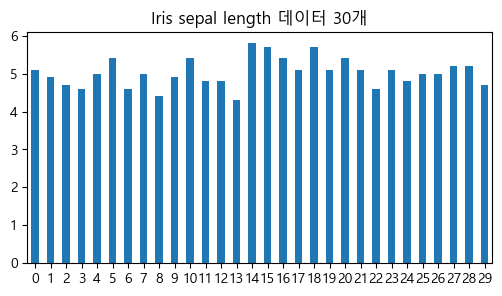

In [16]:
# 하단의 숫자 기울기 조절 : rot= 각도
iris = sns.load_dataset('iris')

iris.sepal_length[:30].plot(kind= 'bar', rot=360, figsize=(6,3))
plt.title('Iris sepal length 데이터 30개');

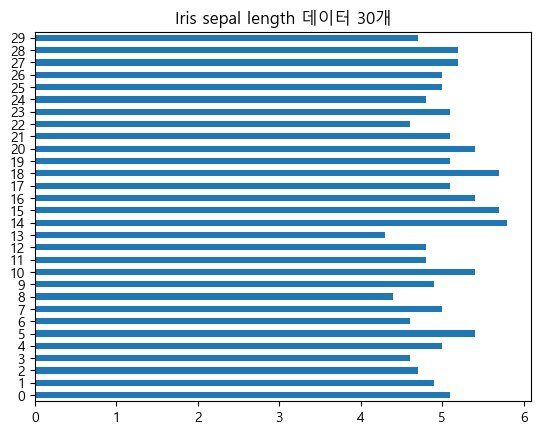

In [20]:
iris.sepal_length[:30].plot(kind= 'barh')
plt.title('Iris sepal length 데이터 30개');

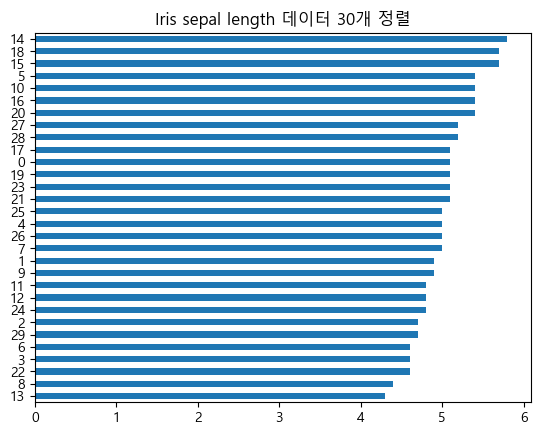

In [21]:
# sort_values() 하면, 오름차순
iris.sepal_length[:30].sort_values().plot(kind= 'barh')
plt.title('Iris sepal length 데이터 30개 정렬');

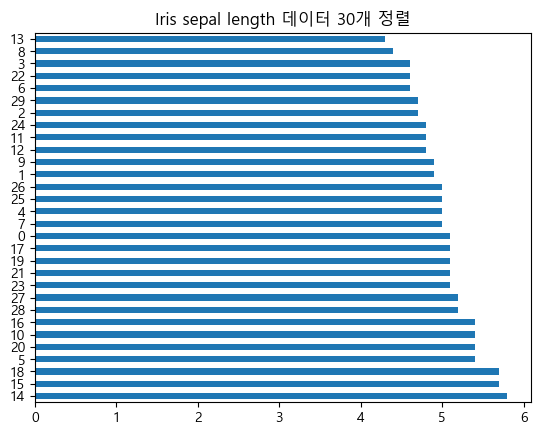

In [23]:
# sort_values(ascending=False) 하면, 내림차순
iris.sepal_length[:30].sort_values(ascending=False).plot(kind= 'barh')
plt.title('Iris sepal length 데이터 30개 정렬');

In [24]:
df2 = iris.groupby('species').mean()
df2

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


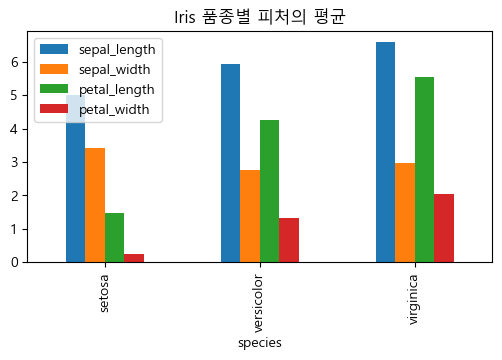

In [25]:
df2.plot.bar(figsize=(6,3))
plt.title('Iris 품종별 피처의 평균');

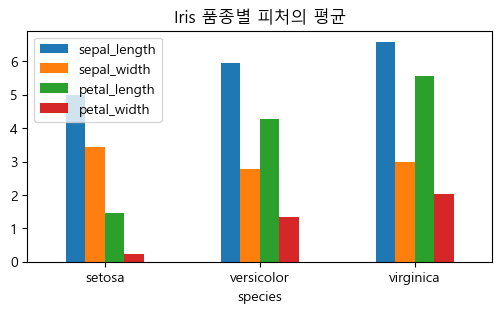

In [26]:
# 하단 글씨 기울기 조절
df2.plot.bar(figsize=(6,3), rot=0)
plt.title('Iris 품종별 피처의 평균');

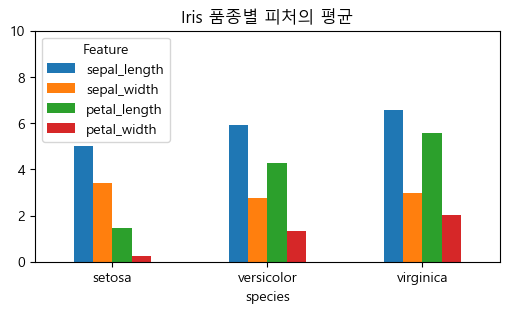

In [28]:
# 범례가 그림과 겹치지 않게 
df2.columns.name = 'Feature'        # 범례에 제목 달기
df2.plot.bar(figsize=(6,3), rot=0)
plt.ylim(0,10)
plt.title('Iris 품종별 피처의 평균');

- Pie chart

In [31]:
titanic = sns.load_dataset('titanic')

s = titanic['class'].value_counts()
s

Third     491
First     216
Second    184
Name: class, dtype: int64

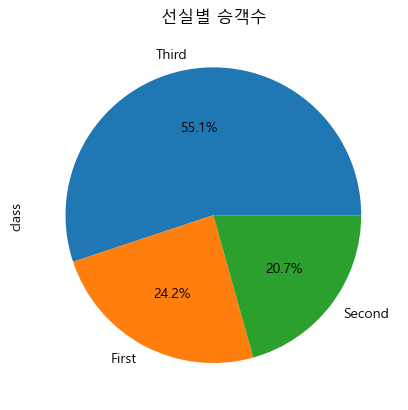

In [34]:
s.plot.pie(autopct='%.1f%%')
plt.title('선실별 승객수');

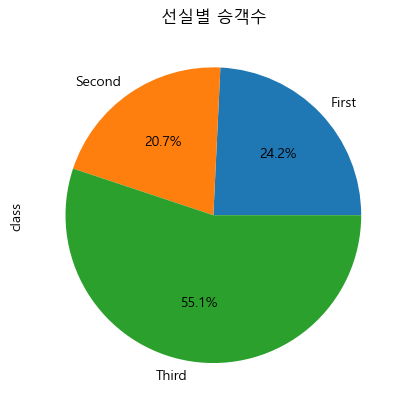

In [35]:
# 데이터 크기가 큰게 밑으로 정렬
s.sort_index().plot.pie(autopct='%.1f%%')
plt.title('선실별 승객수');

- Histogram

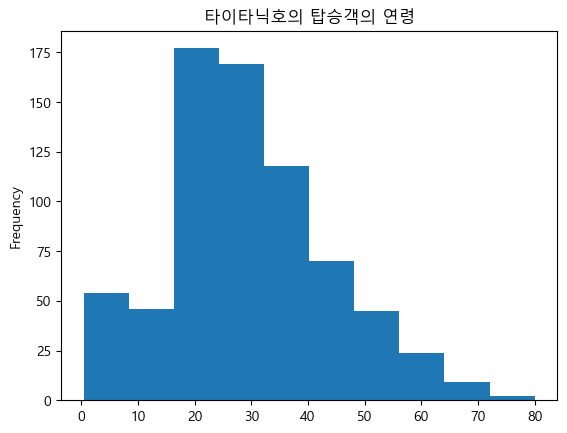

In [36]:
titanic.age.plot.hist()
plt.title('타이타닉호의 탑승객의 연령');

- Box plot

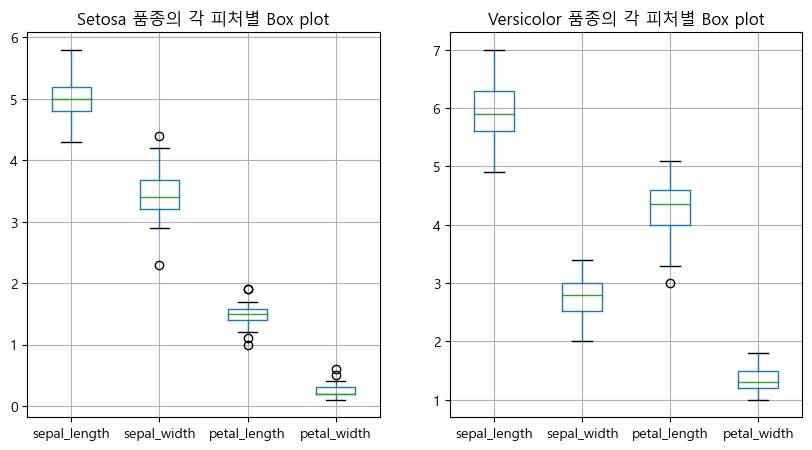

In [44]:
plt.figure(figsize=(10,5))
plt.subplot(121)
iris[iris.species == 'setosa'].boxplot()
plt.title('Setosa 품종의 각 피처별 Box plot')
plt.subplot(122)
iris[iris.species == 'versicolor'].boxplot()
plt.title('Versicolor 품종의 각 피처별 Box plot')
plt.show()